In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
# Setting base path
#ROOT_PATH = os.path.join(os.getcwd(), 'Dataset_csv')
#CBISDDSM_csvPATH = os.path.join('CBISDDSM')
#MIAS_PATH = os.path.join(ROOT_PATH, 'MIAS')

# Load Dataframe from .csv
calc_train = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_test = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_train = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
mass_test = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

image=np.load('mass_train.npy',allow_pickle=True)
images=[]
for i in range(len(image)):
    try:
        #d=dicom.read_file(images_dir[i],force=True)
        #d = dicom.dcmread(images_dir[i])
        #image=d.pixel_array
        image_small = skimage.transform.resize(image[i], (224,224), preserve_range=True)
        images.append(image_small)
    except Exception:
        print(i)
        print("error")

Using TensorFlow backend.


In [4]:
X=np.stack(images)[...,None]
X=np.repeat(X,3,axis=-1)
#X=(X-np.mean(X))/np.std(X) #standardization
#X=(X-np.min(X))/(np.max(X)-np.min(X)) #normalization

#X = (0~65535), X.maen=47557.83, X_std=10686

In [5]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
    #img = rgb2gray(img)
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

In [6]:
X_hist=[]
for i in range(len(X)):
    img=histogram_equalize(X[i])
    X_hist.append(img)

C:\Users\User\Anaconda3\envs\keras\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [7]:
type(X_hist)

list

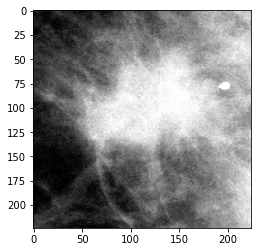

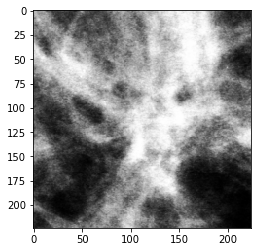

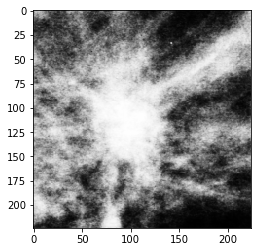

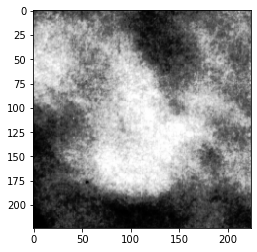

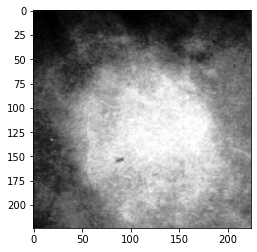

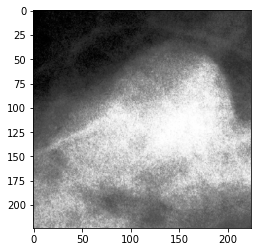

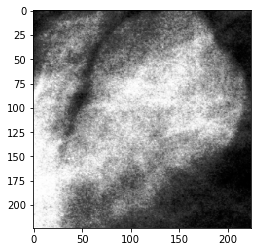

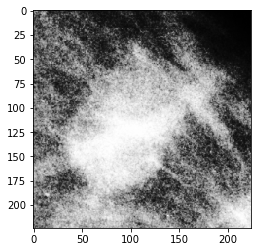

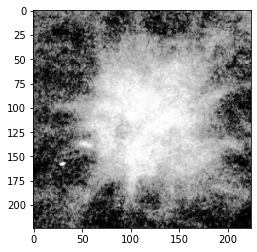

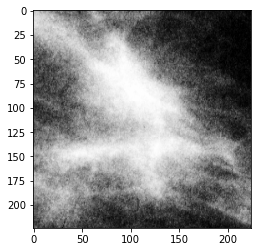

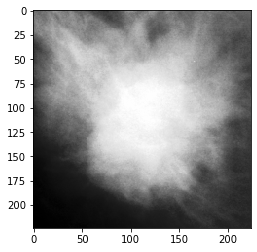

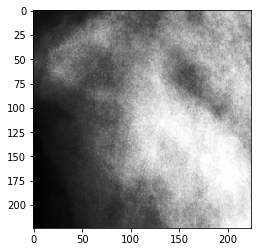

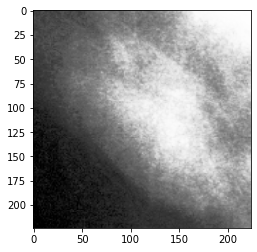

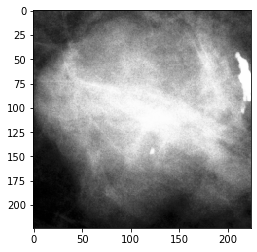

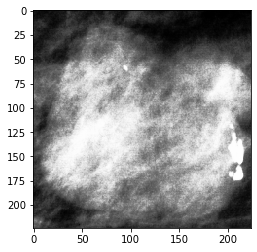

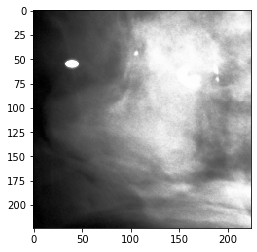

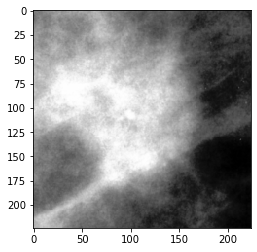

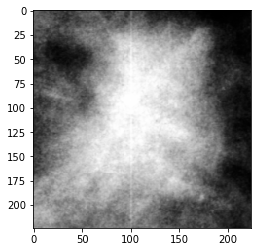

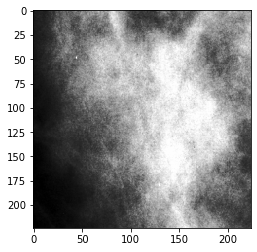

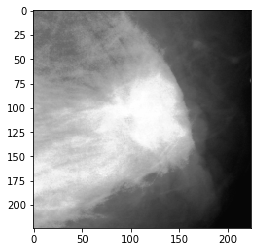

In [8]:
for i in range(20):
    plt.imshow(X_hist[i])
    plt.show()

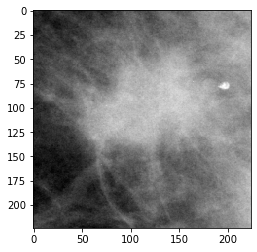

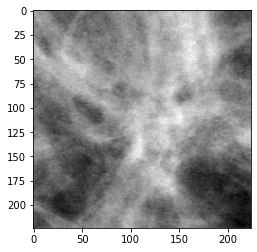

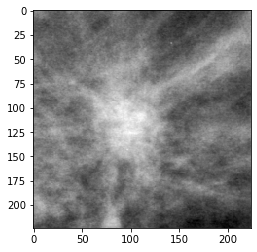

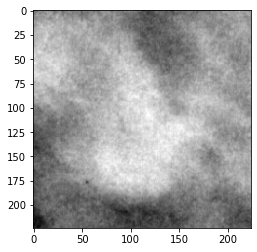

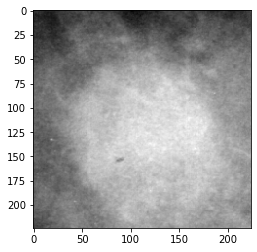

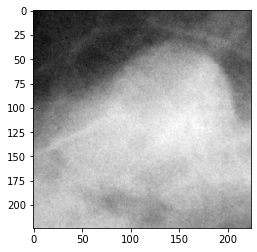

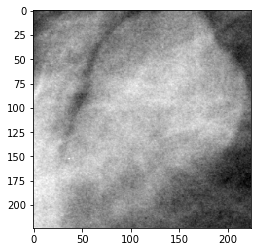

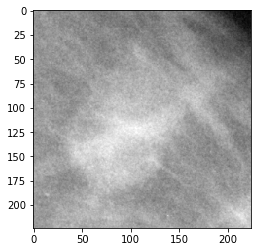

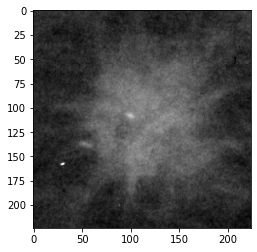

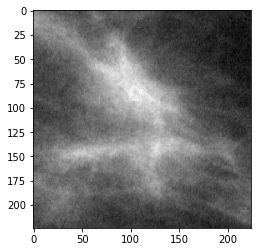

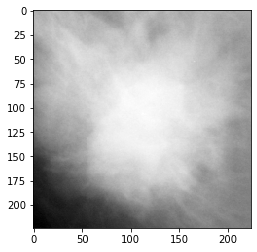

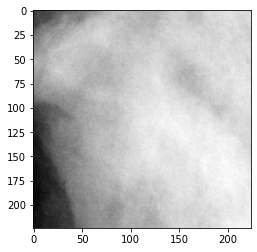

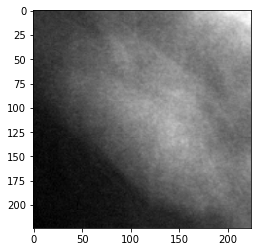

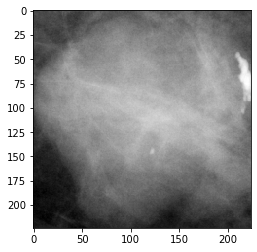

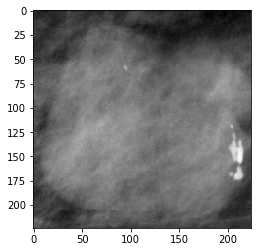

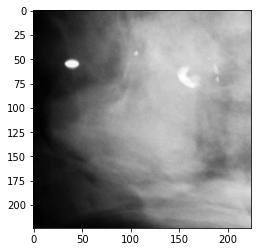

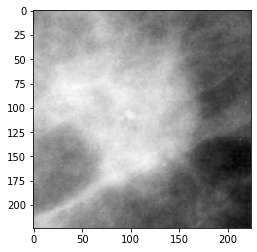

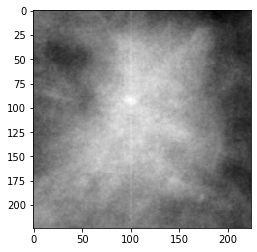

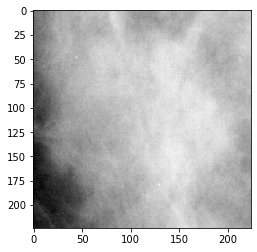

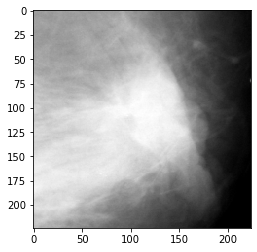

In [9]:
for i in range(20):
    plt.imshow(images[i],cmap='gray')
    plt.show()

In [44]:
y=np.load('mass_train_label.npy')

In [46]:
X_hist_without=[]
y_without=[]

for i in range(len(X_hist)):
    if y[i]=='BENIGN_WITHOUT_CALLBACK':
        continue
    else:
        X_hist_without.append(X_hist[i])
        y_without.append(y[i])

In [47]:
len(X_hist_without)
len(y_without)

1212

In [21]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit(y_without)
# encoded_Y = encoder.transform(y_without)
# one_hot_y = np_utils.to_categorical(encoded_Y)

# y=encoded_Y #BENIGN, MALIGNANT순

In [18]:
np.save('mass_data_X.npy',X_hist_without)

In [51]:
np.save('mass_data_y.npy',y_without)

In [49]:
for i in range(len(y_without)):
    if y_without[i] == 'BENIGN':
        y_without[i] = "mass_BENIGN"
    else:
        y_without[i] = "mass_MALIGANT"

In [50]:
y_without

['mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_MALIGANT',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_BENIGN',
 'mass_MALIGANT',
 'mass_MALIGANT',
